In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 공시지가 제곱미터당 원화
# 임야 - 숲, 대 - 집 지을 수 있는 곳
# 주위환경, 지세명, 형상명, 도로교통 4개가 중요한 변수
# 남향

In [2]:
df = pd.read_csv('./src/2022 표준지 공시지가.csv')
df

C:\Users\PC\AppData\Local\Temp\ipykernel_14088\1201907195.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./src/2022 표준지 공시지가.csv')


,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

In [4]:
# 지역 한정하기
df = df[df['시도명'] == '경상남도']
df

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,1,48121,10100,1,0028,0000,경상남도,창원의창구,북동 28,대,...,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,2,48121,10100,1,0035,0000,경상남도,창원의창구,북동 35,대,...,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,3,48121,10100,1,0072,0000,경상남도,창원의창구,북동 72,대,...,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,4,48121,10100,1,0090,0002,경상남도,창원의창구,북동 90-2,대,...,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,5,48121,10100,1,0100,0002,경상남도,창원의창구,북동 100-2,대,...,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,3901,48890,46037,1,1309,0,경상남도,합천군,용주면 가호리 1309,전,...,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,3902,48890,46037,2,0038,11,경상남도,합천군,용주면 가호리 산38-11,임야,...,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,3903,48890,46037,2,0054,0,경상남도,합천군,용주면 가호리 산54,임야,...,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,3904,48890,46037,2,0073,0,경상남도,합천군,용주면 가호리 산73,임야,...,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [5]:
df.isnull().sum()

일련번호          0
시군구           0
읍면동리          0
지번구분          0
본번지           0
부번지           0
시도명           0
시군구명          0
소재지           0
지목            0
면적            0
용도지역1         0
용도지역2     63794
이용상황          0
주위환경          0
지세명           0
형상명           0
도로교통          0
공시지가          0
지리적위치1        0
지리적위치2     3649
방위        39491
dtype: int64

In [6]:
# df.fillna(0, inplace=True)

In [7]:
df = df.iloc[:, 6:]
df

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,경상남도,창원의창구,북동 28,대,182.0,제1종일반주거지역,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,경상남도,창원의창구,북동 35,대,98.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,경상남도,창원의창구,북동 72,대,162.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,경상남도,창원의창구,북동 90-2,대,138.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,경상남도,창원의창구,북동 100-2,대,180.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,경상남도,합천군,용주면 가호리 1309,전,1131.0,계획관리지역,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,경상남도,합천군,용주면 가호리 산38-11,임야,21376.0,보전관리지역,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,경상남도,합천군,용주면 가호리 산54,임야,21175.0,보전관리지역,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,경상남도,합천군,용주면 가호리 산73,임야,19374.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [8]:
df.columns

Index(['시도명', '시군구명', '소재지', '지목', '면적', '용도지역1', '용도지역2', '이용상황', '주위환경',
       '지세명', '형상명', '도로교통', '공시지가', '지리적위치1', '지리적위치2', '방위'],
      dtype='object')

In [9]:
df['주위환경'].unique()

array(['기존 주택지대', '시장주변 상가지대', '주택 및 상가혼용지대', '노선 상가지대', '일반 주택지대',
       '성숙중인 주택지대', '성숙중인 상가지대', '도심 상가지대', '아파트지대', '시가지주변 농경지대',
       '마을주변 야산지대', '일반 상가지대', '미성숙 상가지대', '근교 농경지대', '마을주변 산림지대',
       '산간 농경지대', '상가 및 업무지대', '정비된 주택지대', '후면 상가지대', '기존 상가지대',
       '국도주변 야산지대', '지방도변 농촌지대', '지방도변 상가지대', '고속도로주변 주택지대', '국도주변 농경지대',
       '순수 산림지대', '시가지주변 산림지대', '역주변 상가지대', '시가지주변 공장지대', '시가지주변 야산지대',
       '마을주변 농경지대', '도시 유원지대', '미개발지대', '시장지대', '산업단지', '국도주변 농촌지대',
       '순수 농경지대', '근교 농촌지대', '마을주변 경지정리지대', '순수 농촌지대', '국도주변 경지정리지대',
       '국도주변 산림지대', '순수 경지정리지대', '소규모 공장지대', '국도변 상가지대', '아파트단지주변 상가지대',
       '공동 주택지대', '지방도주변 농경지대', '지방도주변 야산지대', '지방도주변 경지정리지대', '산간 농촌지대',
       '지방도주변 산림지대', '면소재지 농경지대', '개발 예정지대', '정비된 상가지대', '미성숙 주택지대',
       '면소재지내 주택지대', '면소재지내 농촌지대', '전원 주택지대', '농촌 취락지대', '농공단지',
       '읍소재지내 경지정리지대', '신흥 주택지대', '번화한 상가지대', '신구옥 혼성지대', '해안 상가지대',
       '해안 주택지대', '중심 상가지대', '도심 업무지대', '공장 및 업무지대', '근교 경지정리지대',
       '해안 농경지대', '순수 야산지대', '주택재

In [10]:
# 시군구명별 분포
fig = go.Figure(data=[go.Pie(labels=df['시군구명'].unique(), values=df['시군구명'].value_counts())])
fig.update_layout(width=900, height=800, title='시군구명별 분포')
fig.show()

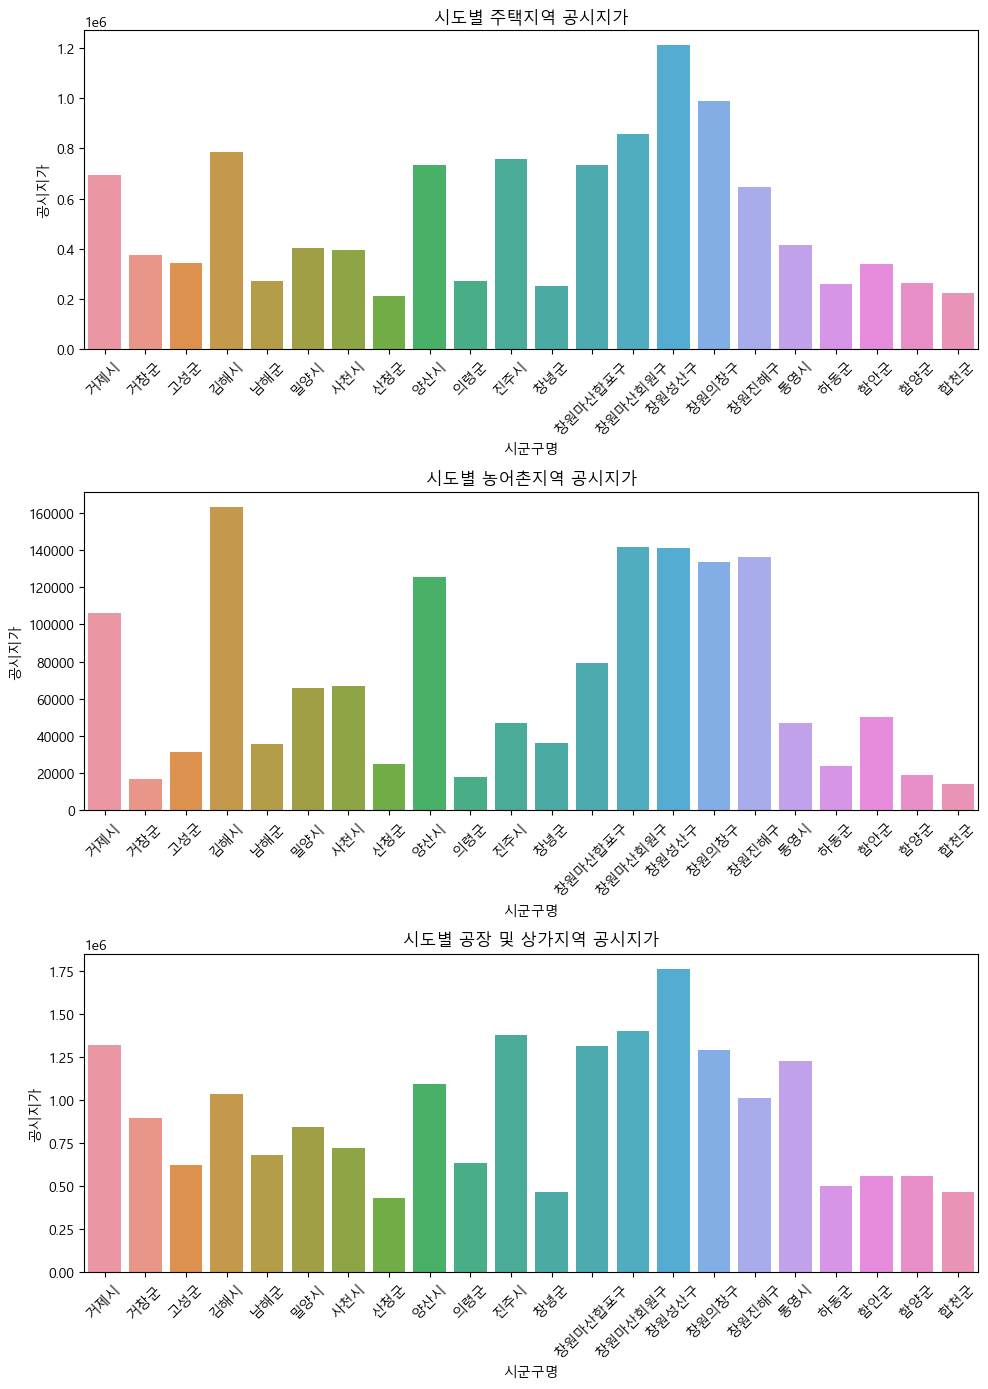

In [11]:
fig, axes = plt.subplots(3, figsize=(10, 14))

house = df[df['주위환경'].str.contains('주택|아파트')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=house, x='시군구명', y='공시지가', ax=axes[0])
axes[0].set_title('시도별 주택지역 공시지가')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


country = df[df['주위환경'].str.contains('농촌|농경|산림|농어촌')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=country, x='시군구명', y='공시지가', ax=axes[1])
axes[1].set_title('시도별 농어촌지역 공시지가')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


factory = df[df['주위환경'].str.contains('공장|상가|업무|산업')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=factory, x='시군구명', y='공시지가', ax=axes[2])
axes[2].set_title('시도별 공장 및 상가지역 공시지가')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [12]:
# 지세명별 분포
fig = go.Figure(data=[go.Pie(labels=df['지세명'].unique(), values=df['지세명'].value_counts())])
fig.update_layout(width=700, height=400, title='지세명별 분포')
fig.show()

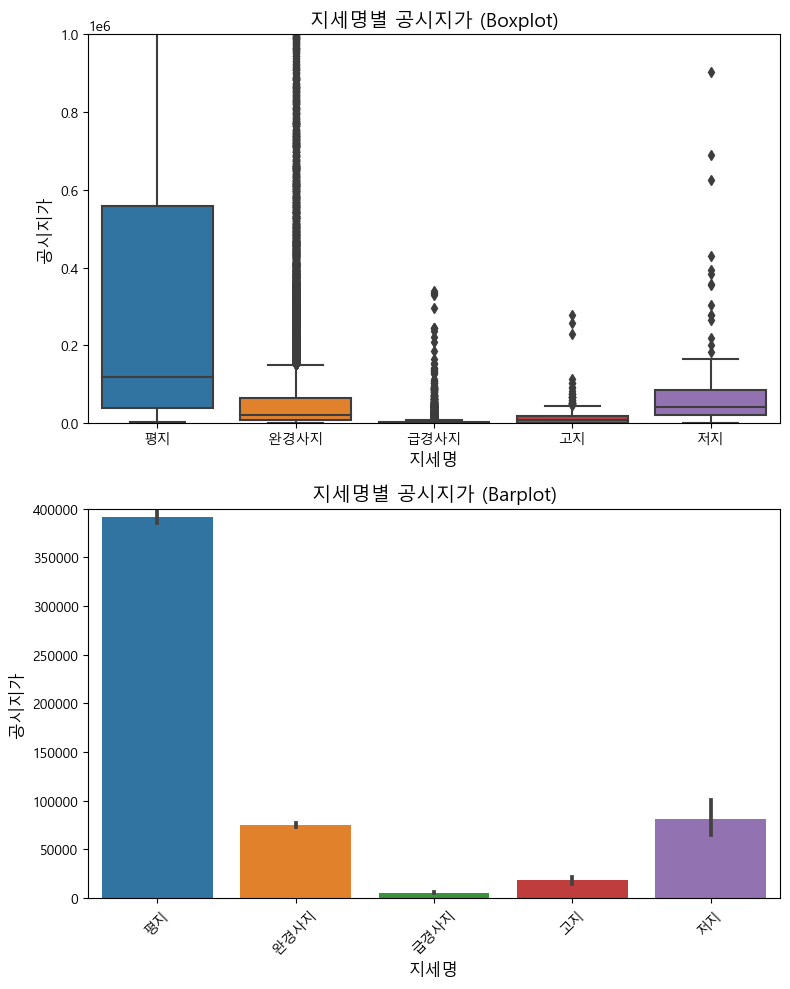

In [13]:
df_1 = df[df['지세명'] == '평지']
df_2 = df[df['지세명'] == '완경사지']
df_3 = df[df['지세명'] == '급경사지']
df_4 = df[df['지세명'] == '고지']
df_5 = df[df['지세명'] == '저지']

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.boxplot(data=pd.concat([df_1, df_2, df_3, df_4, df_5]), x='지세명', y='공시지가', ax=axes[0])
axes[0].set_xlabel('지세명', fontsize=12)
axes[0].set_ylabel('공시지가', fontsize=12)
axes[0].set_title('지세명별 공시지가 (Boxplot)', fontsize=14)
axes[0].set_ylim(0, 1000000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)

sns.barplot(data=pd.concat([df_1, df_2, df_3, df_4, df_5]), x='지세명', y='공시지가', ax=axes[1])
axes[1].set_xlabel('지세명', fontsize=12)
axes[1].set_ylabel('공시지가', fontsize=12)
axes[1].set_title('지세명별 공시지가 (Barplot)', fontsize=14)
axes[1].set_ylim(0, 400000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)

plt.xticks(rotation=45)
# plt.ylim(0, 100000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)
plt.tight_layout()
plt.show()



In [14]:
df['형상명'].unique()

array(['사다리형', '부정형', '세로장방형', '가로장방형', '정방형', '자루형'], dtype=object)

In [15]:
# 도로교통별 분포
fig = go.Figure(data=[go.Pie(labels=df['형상명'].unique(), values=df['형상명'].value_counts())])
fig.update_layout(width=700, height=700, title='형상명별 분포')
fig.show()

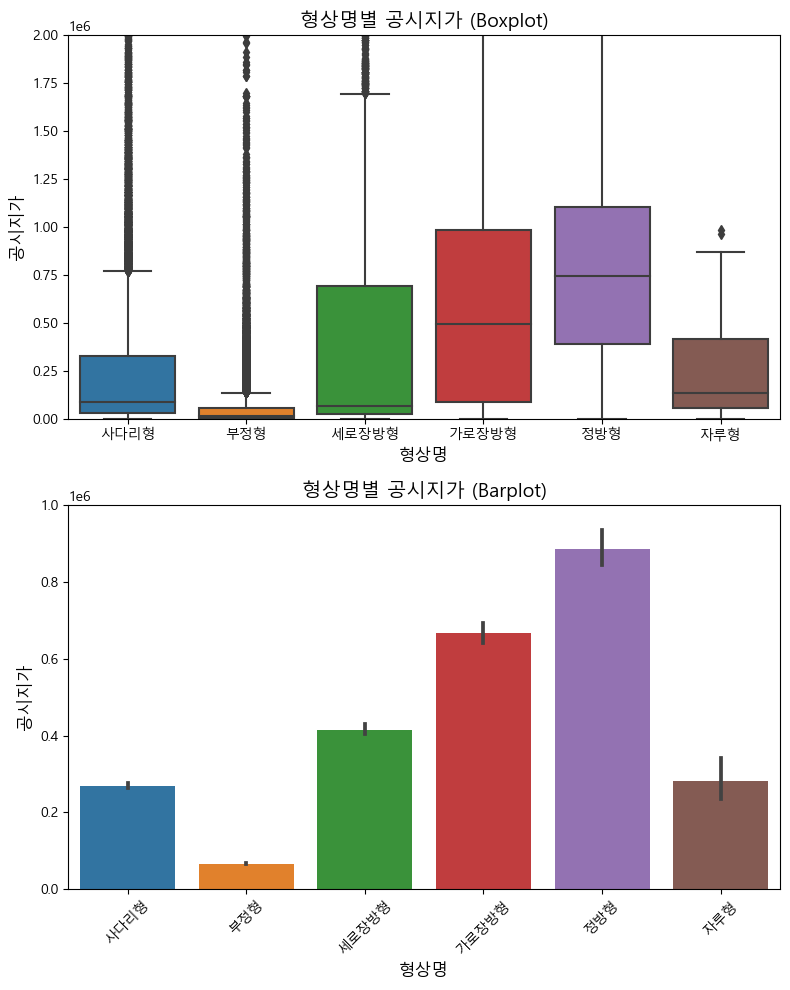

In [16]:
df_1 = df[df['형상명'] == '사다리형']
df_2 = df[df['형상명'] == '부정형']
df_3 = df[df['형상명'] == '세로장방형']
df_4 = df[df['형상명'] == '가로장방형']
df_5 = df[df['형상명'] == '정방형']
df_6 = df[df['형상명'] == '자루형']

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.boxplot(data=pd.concat([df_1, df_2, df_3, df_4, df_5, df_6]), x='형상명', y='공시지가', ax=axes[0])
axes[0].set_xlabel('형상명', fontsize=12)
axes[0].set_ylabel('공시지가', fontsize=12)
axes[0].set_title('형상명별 공시지가 (Boxplot)', fontsize=14)
axes[0].set_ylim(0, 2000000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)

sns.barplot(data=pd.concat([df_1, df_2, df_3, df_4, df_5, df_6]), x='형상명', y='공시지가', ax=axes[1])
axes[1].set_xlabel('형상명', fontsize=12)
axes[1].set_ylabel('공시지가', fontsize=12)
axes[1].set_title('형상명별 공시지가 (Barplot)', fontsize=14)
axes[1].set_ylim(0, 1000000)  # 원하는 y축 범위로 설정 (예: 0부터 400,000)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
df['도로교통'].unique()

array(['소로한면', '세각(불)', '세로(불)', '소로각지', '세로(가)', '중로한면', '중로각지', '광대세각',
       '광대소각', '맹지', '광대한면', '세각(가)'], dtype=object)

In [18]:
# 도로교통별 분포
fig = go.Figure(data=[go.Pie(labels=df['도로교통'].unique(), values=df['도로교통'].value_counts())])
fig.update_layout(width=700, height=700, title='도로교통별 분포')
fig.show()

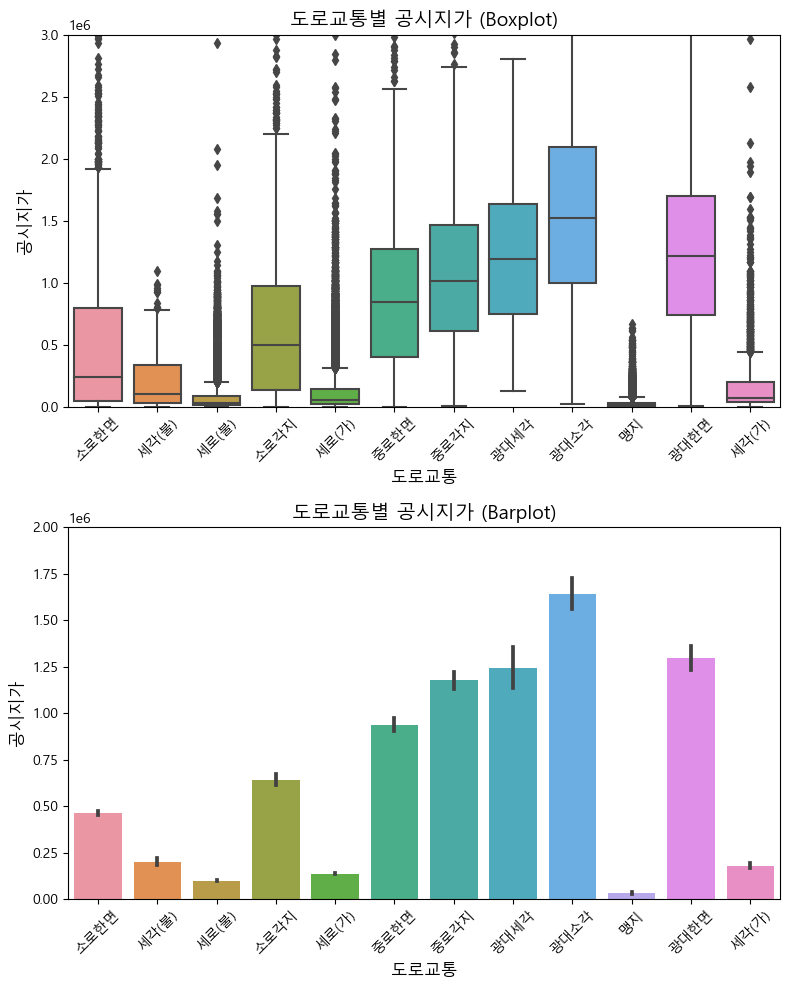

In [19]:
traffic_conditions = ['소로한면', '세각(불)', '세로(불)', '소로각지', '세로(가)', '중로한면', '중로각지', '광대세각', '광대소각', '맹지', '광대한면', '세각(가)']
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

for i, condition in enumerate(traffic_conditions):
    df_condition = df[df['도로교통'] == condition]
    sns.boxplot(data=df_condition, x='도로교통', y='공시지가', ax=axes[0], order=traffic_conditions)
    sns.barplot(data=df_condition, x='도로교통', y='공시지가', ax=axes[1], order=traffic_conditions)

axes[0].set_xlabel('도로교통', fontsize=12)
axes[0].set_ylabel('공시지가', fontsize=12)
axes[0].set_title('도로교통별 공시지가 (Boxplot)', fontsize=14)
axes[0].set_ylim(0, 3000000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)
axes[0].set_xticklabels(traffic_conditions, rotation=45)

axes[1].set_xlabel('도로교통', fontsize=12)
axes[1].set_ylabel('공시지가', fontsize=12)
axes[1].set_title('도로교통별 공시지가 (Barplot)', fontsize=14)
axes[1].set_ylim(0, 2000000)  # 원하는 y축 범위로 설정 (예: 0부터 400,000)
axes[1].set_xticklabels(traffic_conditions, rotation=45)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,경상남도,창원의창구,북동 28,대,182.0,제1종일반주거지역,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,경상남도,창원의창구,북동 35,대,98.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,경상남도,창원의창구,북동 72,대,162.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,경상남도,창원의창구,북동 90-2,대,138.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,경상남도,창원의창구,북동 100-2,대,180.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,경상남도,합천군,용주면 가호리 1309,전,1131.0,계획관리지역,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,경상남도,합천군,용주면 가호리 산38-11,임야,21376.0,보전관리지역,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,경상남도,합천군,용주면 가호리 산54,임야,21175.0,보전관리지역,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,경상남도,합천군,용주면 가호리 산73,임야,19374.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [21]:
df['방위'].unique()

array(['북향', '남향', '북서향', '동향', nan, '남서향', '남동향', '북동향', '서향'],
      dtype=object)

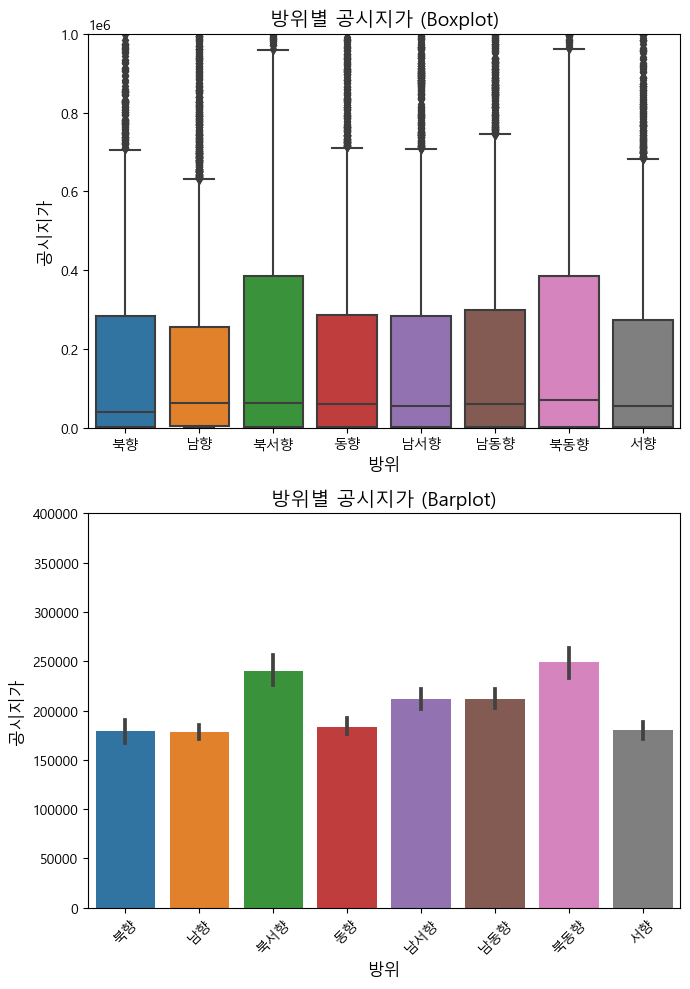

In [23]:
directions = ['북향', '남향', '북서향', '동향', '남서향', '남동향', '북동향', '서향']
fig, axes = plt.subplots(2, 1, figsize=(7, 10))

for i, direction in enumerate(directions):
    df_direction = df[df['방위'] == direction]
    sns.boxplot(data=df_direction, x='방위', y='공시지가', ax=axes[0], order=directions)
    sns.barplot(data=df_direction, x='방위', y='공시지가', ax=axes[1], order=directions)

axes[0].set_xlabel('방위', fontsize=12)
axes[0].set_ylabel('공시지가', fontsize=12)
axes[0].set_title('방위별 공시지가 (Boxplot)', fontsize=14)
axes[0].set_ylim(0, 1000000)  # 원하는 y축 범위로 설정 (예: 0부터 1,000,000)

axes[1].set_xlabel('방위', fontsize=12)
axes[1].set_ylabel('공시지가', fontsize=12)
axes[1].set_title('방위별 공시지가 (Barplot)', fontsize=14)
axes[1].set_ylim(0, 400000)  # 원하는 y축 범위로 설정 (예: 0부터 400,000)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
df

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,경상남도,창원의창구,북동 28,대,182.0,제1종일반주거지역,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,경상남도,창원의창구,북동 35,대,98.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,경상남도,창원의창구,북동 72,대,162.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,경상남도,창원의창구,북동 90-2,대,138.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,경상남도,창원의창구,북동 100-2,대,180.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,경상남도,합천군,용주면 가호리 1309,전,1131.0,계획관리지역,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,경상남도,합천군,용주면 가호리 산38-11,임야,21376.0,보전관리지역,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,경상남도,합천군,용주면 가호리 산54,임야,21175.0,보전관리지역,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,경상남도,합천군,용주면 가호리 산73,임야,19374.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [36]:
df.groupby([df['시군구명'].str.contains('창원')]).sum()
# df.groupby('시군구명')['공시지가'].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_14088\1792885827.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,면적,공시지가
시군구명,,
False,223350150.3,9928165110
True,20734624.9,4576075425


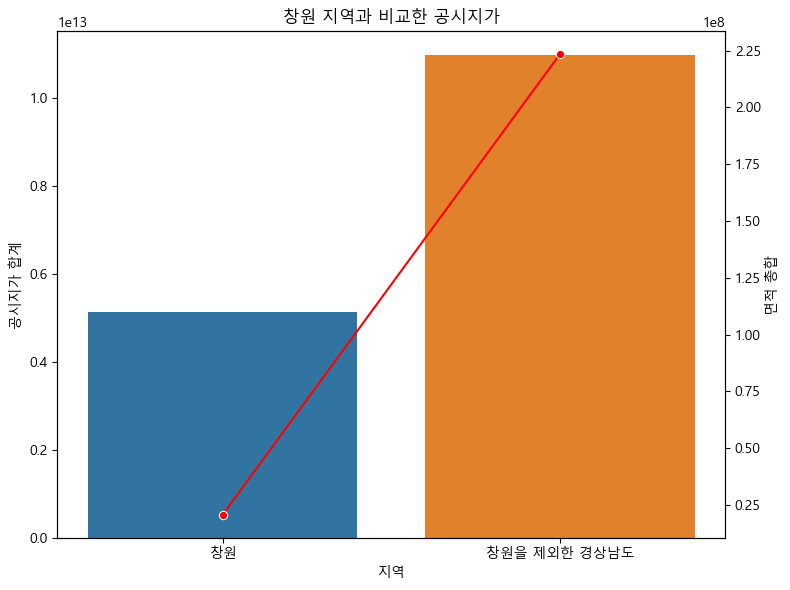

In [77]:
# 창원을 포함하는 지역을 하나로 묶기
df['시군구그룹'] = df['시군구명'].apply(lambda x: '창원' if '창원' in x else '창원을 제외한 경상남도')

# 각 행의 '면적'과 '공시지가'를 곱하여 '총 공시가격' 계산
df['총 공시가격'] = df['면적'] * df['공시지가']

# 시군구그룹별로 총 공시가격과 면적의 합계 계산
df_grouped = df.groupby('시군구그룹').agg({'총 공시가격': 'sum', '면적': 'sum'}).reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 총 공시가격 막대 그래프
sns.barplot(data=df_grouped, x='시군구그룹', y='총 공시가격', ax=ax)
ax.set_xlabel('지역')
ax.set_ylabel('공시지가 합계')
ax.set_title('창원 지역과 비교한 공시지가')

# 면적 선 그래프
ax2 = ax.twinx()
sns.lineplot(data=df_grouped, x='시군구그룹', y='면적', color='red', marker='o', ax=ax2)
ax2.set_ylabel('면적 총합')

plt.tight_layout()
plt.show()

plt.show()

In [79]:
df['시군구그룹']

465236              창원
465237              창원
465238              창원
465239              창원
465240              창원
              ...     
529420    창원을 제외한 경상남도
529421    창원을 제외한 경상남도
529422    창원을 제외한 경상남도
529423    창원을 제외한 경상남도
529424    창원을 제외한 경상남도
Name: 시군구그룹, Length: 64189, dtype: object

In [73]:
cw_sung = df[df['시군구명'].str.contains('성산')]['공시지가'].sum()
cw_ui = df[df['시군구명'].str.contains('의창')]['공시지가'].sum()
cw_hap = df[df['시군구명'].str.contains('합포')]['공시지가'].sum()
cw_hoi = df[df['시군구명'].str.contains('회원')]['공시지가'].sum()
cw_jin = df[df['시군구명'].str.contains('진해')]['공시지가'].sum()

print(cw_sung)
print(cw_ui)
print(cw_hap)
print(cw_hoi)
print(cw_jin)

696767180
871911400
1365844995
875586650
765965200


In [75]:
jin = []
ui = []
hoi = []
hap = []
sung = []

for i in df['시군구명'].unique():
    if '창원' not in i:
        if df[df['시군구명'] == i]['공시지가'].sum() < cw_sung:
            sung.append(i)
        if df[df['시군구명'] == i]['공시지가'].sum() < cw_jin:
            jin.append(i)
        if df[df['시군구명'] == i]['공시지가'].sum() < cw_ui:
            ui.append(i)
        if df[df['시군구명'] == i]['공시지가'].sum() < cw_hoi:
            hoi.append(i)
        if df[df['시군구명'] == i]['공시지가'].sum() < cw_hap:
            hap.append(i)




print('성산구 총 고시지가보다 작은 시군구', ', '.join(sung))
print('진해구 총 고시지가보다 작은 시군구', ', '.join(jin))
print('의창구 총 고시지가보다 작은 시군구', ', '.join(ui))
print('회원구 총 고시지가보다 작은 시군구', ', '.join(hoi))
print('합포구 총 고시지가보다 작은 시군구', ', '.join(hap))


성산구 총 고시지가보다 작은 시군구 사천시, 밀양시, 의령군, 함안군, 창녕군, 고성군, 남해군, 하동군, 산청군, 함양군, 거창군, 합천군
진해구 총 고시지가보다 작은 시군구 통영시, 사천시, 밀양시, 의령군, 함안군, 창녕군, 고성군, 남해군, 하동군, 산청군, 함양군, 거창군, 합천군
의창구 총 고시지가보다 작은 시군구 통영시, 사천시, 밀양시, 의령군, 함안군, 창녕군, 고성군, 남해군, 하동군, 산청군, 함양군, 거창군, 합천군
회원구 총 고시지가보다 작은 시군구 통영시, 사천시, 밀양시, 의령군, 함안군, 창녕군, 고성군, 남해군, 하동군, 산청군, 함양군, 거창군, 합천군
합포구 총 고시지가보다 작은 시군구 통영시, 사천시, 밀양시, 거제시, 양산시, 의령군, 함안군, 창녕군, 고성군, 남해군, 하동군, 산청군, 함양군, 거창군, 합천군
